# My Capstone Project - Assignment 9
*Tesla Stock Prediction
*Uses a kaggle data set

In [37]:
%cd /content/drive/MyDrive/CapstoneProject/


/content/drive/MyDrive/CapstoneProject


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This project uses the Tesla Stock Prediction Dataset from Kaggle. (https://www.kaggle.com/datasets/amohankumar/tesla-stock-price-prediction-dataset?resource=download)



*   This datatset contains TESLA stock prices from 29/09/2021 to 29/09/2022, over 253 trading days.
*   Details of this stock include the variables of opening price, closing price, the adjusted closing price, the day's high and low price, the volume traded.
*   My task is to create a machine learning model that predicts the closing price based on the other variables (attributes). If it is possible to predict closing price on variables such as opening price, that gives traders opportunities to make profits before closing. I have chosen Closing Price not Adjusted Closing Price as that is the price traders will take at the end of the day.






  

In [38]:
!ls

DataForML.pkl  Final_LinearRegression.pkl  TeslaData.csv


In [39]:
import warnings

# Importing tools to read data
import pandas as pd
import numpy as np

TeslaData = pd.read_csv('/content/drive/MyDrive/CapstoneProject/TeslaData.csv', encoding='latin')
print('Dataset size before deleting dupicate values:', TeslaData.shape)

# Removing duplicate rows if any
TeslaData = TeslaData.drop_duplicates()
print('Dataset size after deleting duplicate values:', TeslaData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
print(TeslaData.head(10))

Dataset size before deleting dupicate values: (253, 7)
Dataset size after deleting duplicate values: (253, 7)
         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-29  259.933319  264.500000  256.893341  260.436676  260.436676   
1  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
2  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
3  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
4  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
5  2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   
6  2021-10-07  261.820007  268.333344  261.126678  264.536682  264.536682   
7  2021-10-08  265.403320  265.459991  260.303345  261.829987  261.829987   
8  2021-10-11  262.549988  267.079987  261.833344  263.980011  263.980011   
9  2021-10-12  266.976654  270.773346  265.523346  268.573334  268.573334   

     Volume  
0  62828700  
1  53868000  


# Step 1 Observations:


*   TeslaData.csv contains 253 data entries in each of 7 attributes and no duplicate values.
These attributes are listed as:
  *   Date
  *   Open
  *   High
  *   Low
  *   Close
  *   Adjused Close
  *   Volume









# Step 2: Problem Statement


*   This model seeks to predict the closing price of the Telsa stock based on the other attributes. The target variable = Close (the closing price at the end of the trading day).





# Step 3 Choosing the appropriate ML Algorithm



*   As the target is continuous and the predictor data are continuous, I have chosen a Machine Learning Regression model.



# Step 4: Visualising the distribution of Close variable


*   Target variable distribution must be well distribute or predictive modelling will be innaccurate
*   A bell curve is the target shape for the distribution
*   Regression algorithm modelling and analysis necessitates a bell curve or close to it




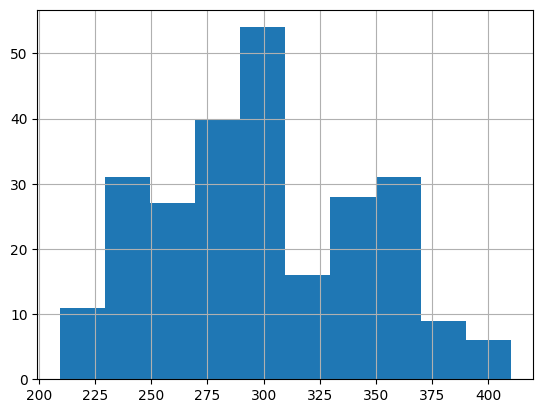

In [40]:
#creating histogram for target variable to see closing prices distibution
TeslaData= pd.read_csv("TeslaData.csv")

#IMport matplotlib
import matplotlib.pyplot as plt

import pandas as pd
TeslaData["Close"].hist()
plt.show()

Step 4 Observations


*   Data distribution is acceptable in a bell curve, although there is a dip around the 320 mark. The peak of the closing date observations is 300 with 50 observations at that price. This may represent what traders see as the price ceiling over that period.
*   We know there are 253 days represented in the data, which is sufficient number of rows to give signficiant results.



# Step 5: Data Exploration at the Basic Level

Four commands used for basic data exploratory python analysis


*   head(): Provides sample data rows e.g. Head(10): returns rows 0-9
*   info(): Provides summarized info
*   describe(): statistical details of data are described
*   nunique(): Identifies if a collumn is categorical or continuous





In [41]:
TeslaData.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [42]:
TeslaData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
252,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77393100


In [43]:
TeslaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [44]:
TeslaData.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,253,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
unique,253,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-09-29,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,NaN,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,NaN,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,NaN,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,NaN,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,NaN,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07


In [45]:
TeslaData.nunique()

Date         253
Open         249
High         251
Low          251
Close        252
Adj Close    252
Volume       253
dtype: int64

Step 5 Observations:

All columns except date are continous.
Explanation:

The date is a categorical variable because it represents distinct points in time with no inherent order.
All other values are continuous because they represent a range of values with a meaningful order. For example, the "Open" value can take on any value between 0 and infinity, and there is a clear order between different values (e.g., 100 is higher than 50)



*   Date-Categorical. Selected
*   Open-Continuous. Selected
*   High-Continuous. Selected
*   Low-Continuous. Selected
*   Close-Continous. Selected
*   Asj Volume- Continuous. Selected
*   Volume-Continuous. Selected






Step 6: Identifying and rejecting useless columns

No column data type is qualitative
No columns have been removed


# Step 7: Visual Exploratory Data Analysis of data (with Histogram and Barcharts)

Visualise distribution of Categorical Predictor variable (Date) using bar plot
Categorical

Text(0, 0.5, 'Close')

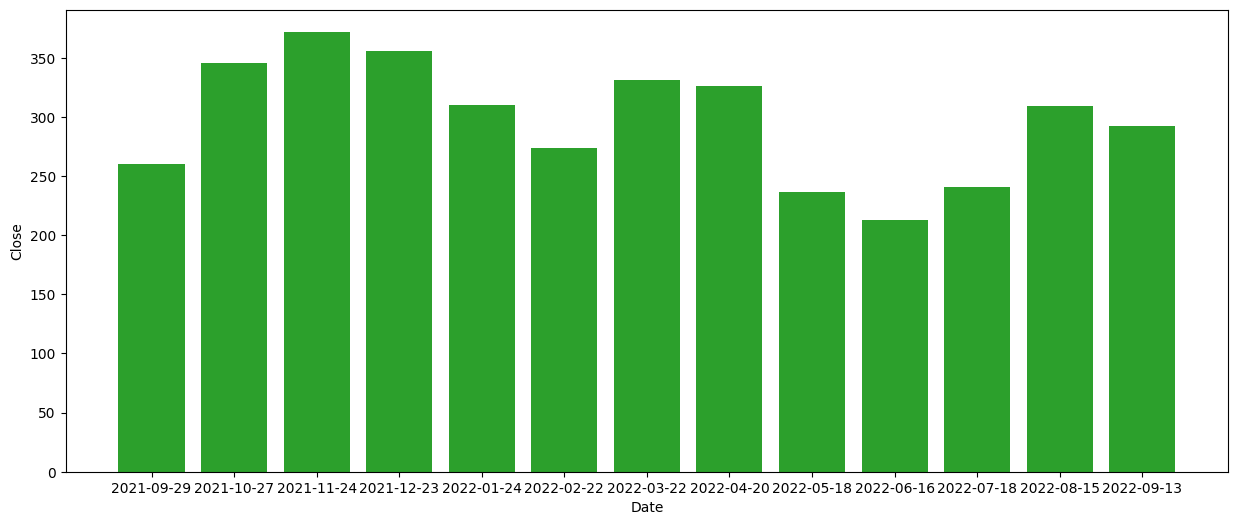

In [46]:
import matplotlib.pyplot as plt

# Select every 10th row starting from the 20th row for ease of reading.
TeslaData_filtered = TeslaData.iloc[::20, :]

# Extract the date and Close data from the DataFrame.
dates = TeslaData_filtered['Date'].tolist()
counts = TeslaData['Close'].tolist()

# Create the bar chart.
plt.figure(figsize=(15, 6))
plt.bar(dates, TeslaData_filtered['Close'], color='tab:green')

# Add labels and title.
plt.xlabel('Date')
plt.ylabel('Close')

Observations from Step 8 - Visual Exploratory Data Analysis

*   Bar chart allows interpretation of the Date data column
*   Chart represents closing price of Tesla stock on y axis and the date in monthly intervals. What the graph is showing is that dates in different months have closing prices distributed close to the mean. There do not seem to be any unusual observations.
* The categorical value "Date" is selected for further use.



Step 9: Visualise distibution of all continuous predictor variables in the data using histograms

* Based on Basic Exploratory Data Analyis there are 6 continuous data variables: 'Open', 'High', 'Low', 'Close', 'Adj Value', and 'Volume'.

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

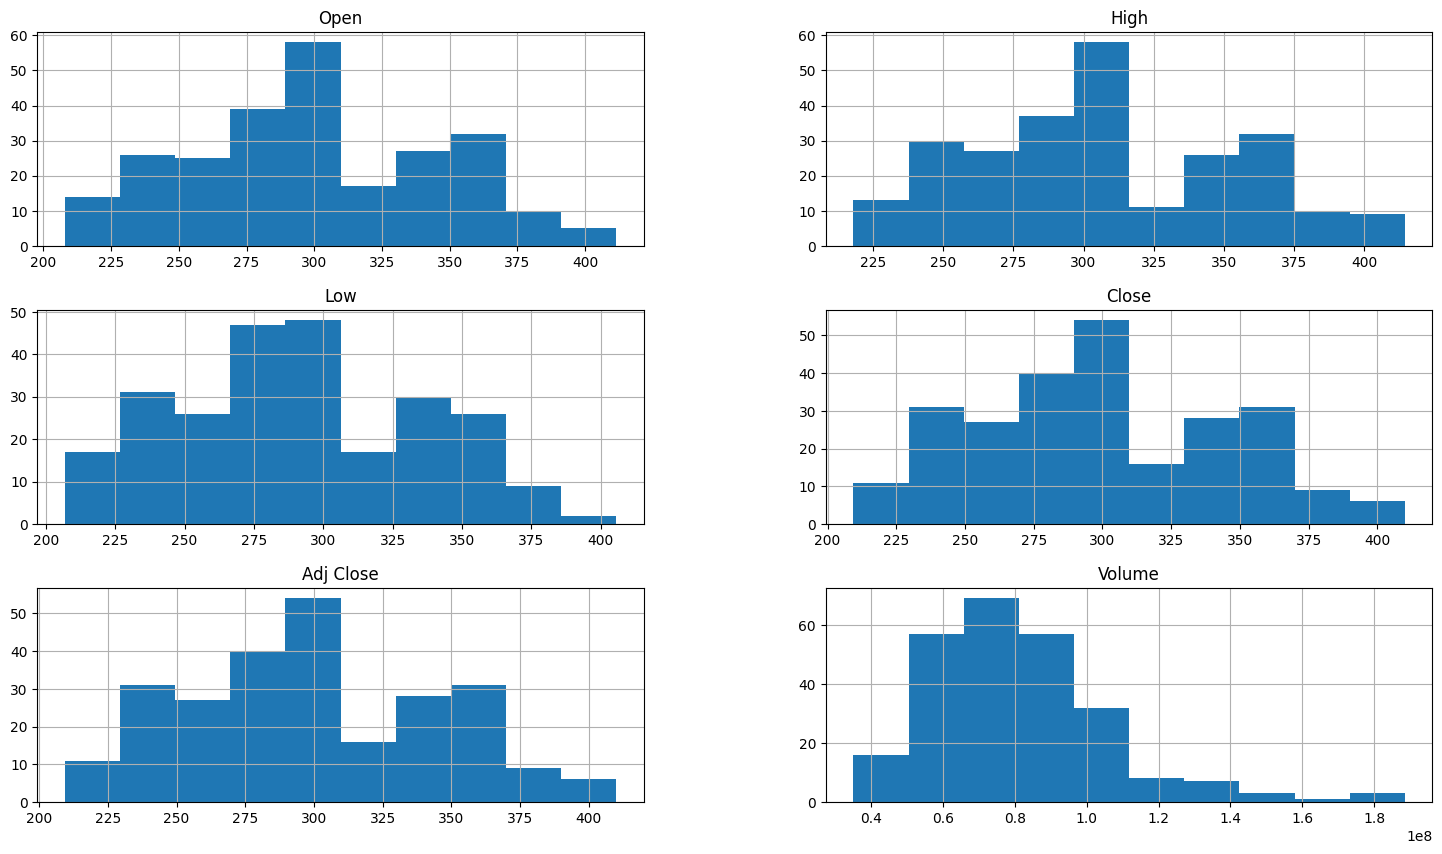

In [47]:
# Plotting histograms of continuous datatypes together

TeslaData.hist (['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], figsize=(18,10))

Step 9 Observations:
The graphs are showing a very similar distribution. Close and Adjusted Close are virtually identical, showing very little change in the Close price. Open and High are also very similar, suggesting this stock opens high. Low and Close are similar, suggesting this stock closes low. On a visual check of the data, traders might conclude the best time to sell is Open and Close might be the best time to buy. Volume is also showing a normal distribution.


## Step 10: Outlier Analysis

Outlier values are defined as more than two standard deviations from the mean.

These can be identified by "tails" in the histograms

Outliers must be treated one data attribute at a time




In [48]:
#Finding Outlier for Close

Quantile1 = TeslaData['Close'].quantile(0.25)
Quantile3 = TeslaData['Close'].quantile(0.75)
IQR = Quantile3 - Quantile1

lower_bound = Quantile1 - 1.5 * IQR
upper_bound = Quantile3 + 1.5 * IQR

outliers = TeslaData[((TeslaData['Close'] < lower_bound) | (TeslaData['Close'] > upper_bound))]

TeslaData['Close'].sort_values(ascending=True)


164    209.386673
180    213.100006
177    215.736664
181    216.759995
165    219.600006
          ...    
66     399.926666
23     402.863342
25     404.619995
27     407.363342
26     409.970001
Name: Close, Length: 253, dtype: float64

In [49]:
#Outlier code returned no values. Check data for missing values.

import pandas as pd

# Check for missing values
missing_values = TeslaData['Close'].isnull().sum()

# Check data type
data_type = TeslaData['Close'].dtype

print("Missing values:", missing_values)
print("Data type:", data_type)

Missing values: 0
Data type: float64


array([[<Axes: title={'center': 'Close'}>]], dtype=object)

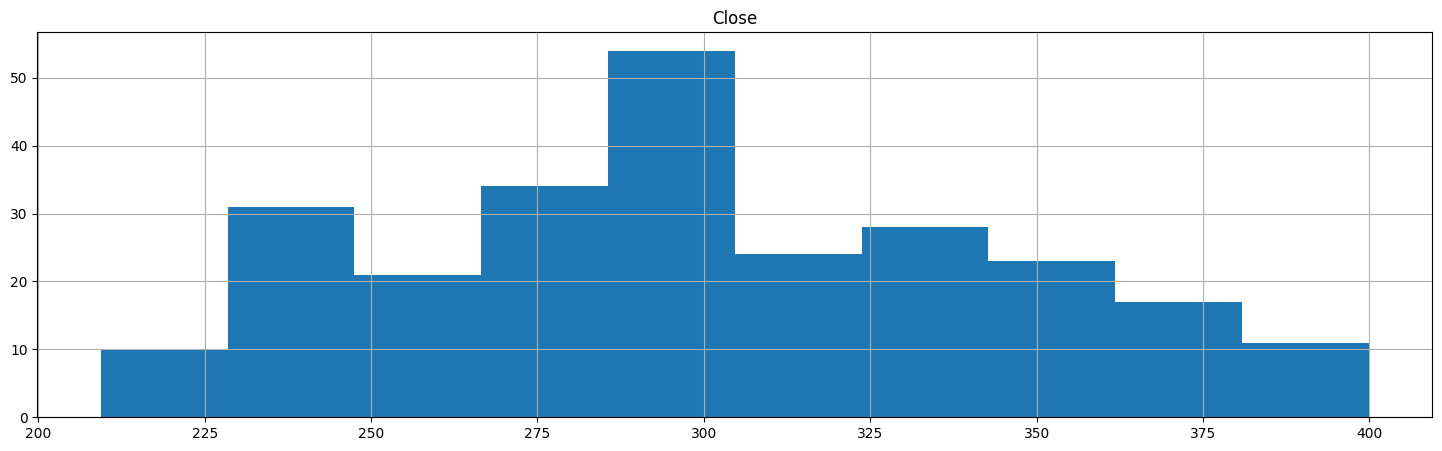

In [50]:
#Replace outliers for Close
#Find nearest values Low=200 High=400

TeslaData.loc[TeslaData['Close'] > 400, 'Close'] = 399.926666

# Visiualising Data Distribution
TeslaData.hist(['Close'], figsize=(18,5))

Observation from Step 11

* There were some outliers above 400 that have been removed. The distribution is now more even, with the two tails very similar fatness.
* It shows the bell shape that is needed for machine learning

## Step 12: Missing Values Analysis

* Missing values are treated for each column separately.


In [51]:
# Find missing values for each column
TeslaData.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No values found to be missing. No further action like removing rows or filling missing data neccessary.

# Step 13: Feature Selection

* Choosing the best collumns (Features) correlated to the target variable (Close).
* Visualising the relationship between the target variable and the predictors (features) results in better data presentation.


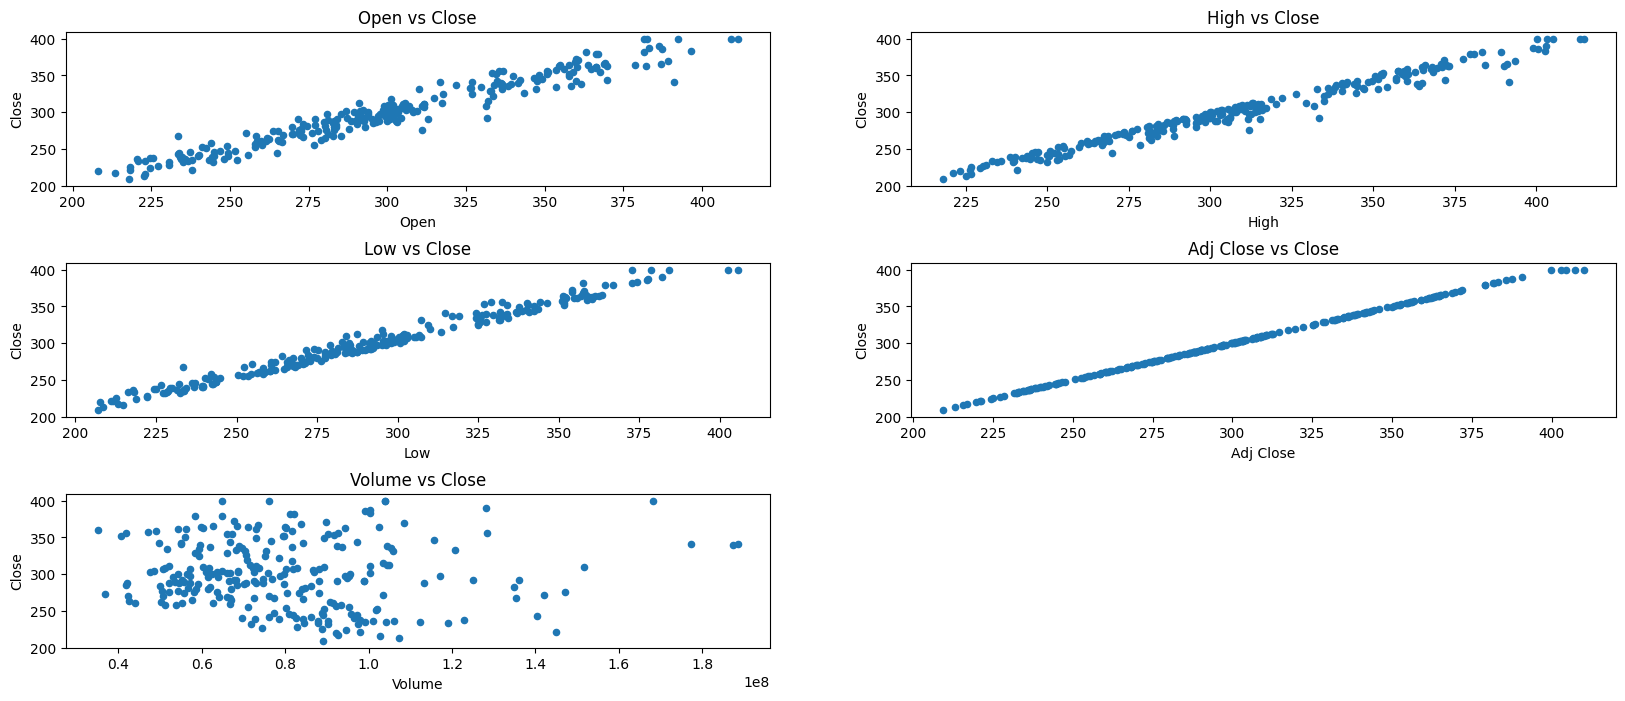

In [105]:
fig = plt.figure(figsize=(20, 8))

for i, predictor in enumerate(ContinuousData):
  if predictor != "Close":
    # Create the subplot
    ax = fig.add_subplot(3, 2, i + 1)

    # Plot the scatter plot
    TeslaData.plot.scatter(x=predictor, y="Close", ax=ax, title=predictor + " vs " + "Close")

plt.subplots_adjust(hspace=0.5)
plt.show()

Scatter Charts Interpretation: these scatter charts show a strong positive correlation between Close and the other variables. Adjusted Close is almost a perfect positive correlation (1), as expected. Volume is not correlated, it shows a cluster of observations around the $300 mark as previously shown in the bar chart. The scatter charts are showing outliers as outliers were not removed for the predictor variables, only the target.

Step 14: Statistical Feature Selection (Continous Vs Continous) using Correlation Value

* r = (Σ(x - x̄)(y - ȳ)) / √(Σ(x - x̄)²Σ(y - ȳ)²)

In [107]:
#Calulating Correlation Matrix
ContinuousData=['Open', 'High', 'Low', 'Adj Close', 'Volume','Close']

#Creating correlation matrix
CorrelationData=TeslaData[ContinuousData].corr()
CorrelationData

,Open,High,Low,Adj Close,Volume,Close
Open,1.000000,0.991269,0.986364,0.971783,-0.047793,0.971708
High,0.991269,1.000000,0.988299,0.986715,0.008397,0.986786
Low,0.986364,0.988299,1.000000,0.990137,-0.104980,0.989937
Adj Close,0.971783,0.986715,0.990137,1.000000,-0.047791,0.999837
Volume,-0.047793,0.008397,-0.104980,-0.047791,1.000000,-0.048739
Close,0.971708,0.986786,0.989937,0.999837,-0.048739,1.000000


In [108]:
CorrelationData['Close'][abs(CorrelationData['High']) > 0.5]

Open         0.971708
High         0.986786
Low          0.989937
Adj Close    0.999837
Close        1.000000
Name: Close, dtype: float64

Observations from step 14:
* Volume is not correlated
* The other variables are highly correlated with Close
* Final selected continuous data variables:
  * Open
  * High
  * Low

  

# Step 15: Relationship exploration: Categorical Vs Continuous -- Box Plots



*   When target variable is continuous and predictor is categorical we analyse them together and observe result.
* As date is the only categorical predictor the box plots below are not perfect.



AttributeError: 'numpy.ndarray' object has no attribute 'set_xticks'

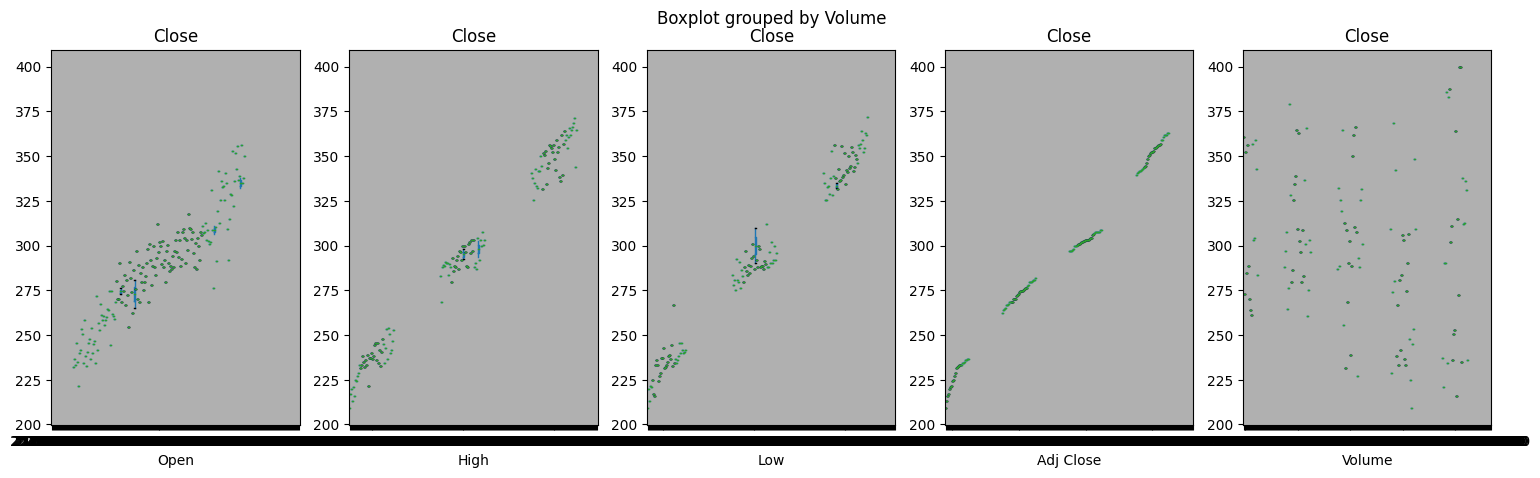

In [66]:


import matplotlib.pyplot as plt

# Create a list of axes objects
PlotCanvas = plt.subplots(nrows=1, ncols=len(CorrelationData), figsize=(18,5))[1]

# Create box plots for each categorical predictor against target variable "Close"
for i, PredictoCol in enumerate(CorrelationData):
    TeslaData.boxplot(column='Close', by=PredictoCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Set the x-axis ticks to the new list of dates
PlotCanvas.set_xticks(range(len(new_dates)))
PlotCanvas.set_xticklabels(new_dates, rotation=45)

# Show the plot
plt.show()

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of Variance


In [67]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway

  # Creating an empty list of final selected predictors
  SelectedPredictors=[]

  print('##### ANOVA Results ##### \n')
  for predictor in CategoricalPredictorList:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    # If the ANOVA P-Value is <0.05, that means we reject H0
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

  return(SelectedPredictors)

#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Low']
FunctionAnova(inpData=TeslaData,
        TargetVariable='Close',
        CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Low is correlated with Close | P-Value: 0.047484162952716465


['Low']

Selecting Final Predictors

In [68]:
SelectedAttributes=['High','Low','Open',]

DataForML=TeslaData[SelectedAttributes]
DataForML.head()

,High,Low,Open
0,264.500000,256.893341,259.933319
1,263.043335,258.333344,260.333344
2,260.260010,254.529999,259.466675
3,268.989990,258.706665,265.500000
4,265.769989,258.066681,261.600006


In [69]:
#Save DataForML for later use
DataForML.to_pickle('DataForML.pkl')


## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development



In [70]:
#Treating all nominal values with dummy variables

DataForML_Numeric=pd.get_dummies(DataForML)
# Adding Target Variable to the data
DataForML_Numeric['Close']=TeslaData['Close']
# Printing sample rows
DataForML_Numeric.head()


,High,Low,Open,Close
0,264.500000,256.893341,259.933319,260.436676
1,263.043335,258.333344,260.333344,258.493347
2,260.260010,254.529999,259.466675,258.406677
3,268.989990,258.706665,265.500000,260.510010
4,265.769989,258.066681,261.600006,260.196655


## Step 18: Machine Learning Model Development:
Splitting the data into Training and Testing sample
We dont use the full data for creating the model (training data).
Some data is randomly selected and kept aside for checking how good the model is.
This is known as Testing Data and the remaining data is called Training data on which the model is built.
Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.





In [71]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['High', 'Low', 'Open', 'Close'], dtype='object')

In [72]:
#Separate Target Variable and Predictor Variables
TargetVariable='Close'
Predictors=['Open', 'High', 'Low']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

Step 19: Standardization of Data

In [74]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(177, 3)
(177,)
(76, 3)
(76,)


Step 20

In [75]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9899937533760674

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.354347  0.332412  0.331690  280.899994           277.0
1  0.264691  0.256255  0.272974  264.536682           267.0
2  0.610079  0.594722  0.536408  314.633331           319.0
3  0.335446  0.319623  0.321194  272.243347           275.0
4  0.339262  0.374985  0.343963  290.533325           288.0
Mean Accuracy on test data: 98.81563905263931

Accuracy values for 10-fold Cross Validation:
 [99.17425879 98.80828309 98.7448211  98.35777343 98.7811455  98.59233323
 98.67083235 98.82471311 99.04293821 99.13887701]

Final Average Accuracy of the model: 98.81


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9927957520984921

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.354347  0.332412  0.331690  280.899994           276.0
1  0.264691  0.256255  0.272974  264.536682           261.0
2  0.610079  0.594722  0.536408  314.633331           324.0
3  0.335446  0.319623  0.321194  272.243347           276.0
4  0.339262  0.374985  0.343963  290.533325           281.0
Mean Accuracy on test data: 97.77353292957281
Median Accuracy on test data: 97.92635631970333

Accuracy values for 10-fold Cross Validation:
 [98.17710745 98.11211401 98.20767774 97.22622642 97.89060486 97.59216648
 97.77658567 97.8088061  98.4447394  98.64045989]

Final Average Accuracy of the model: 97.99


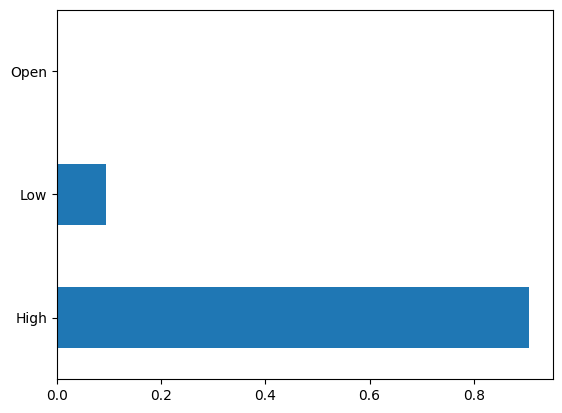

In [76]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

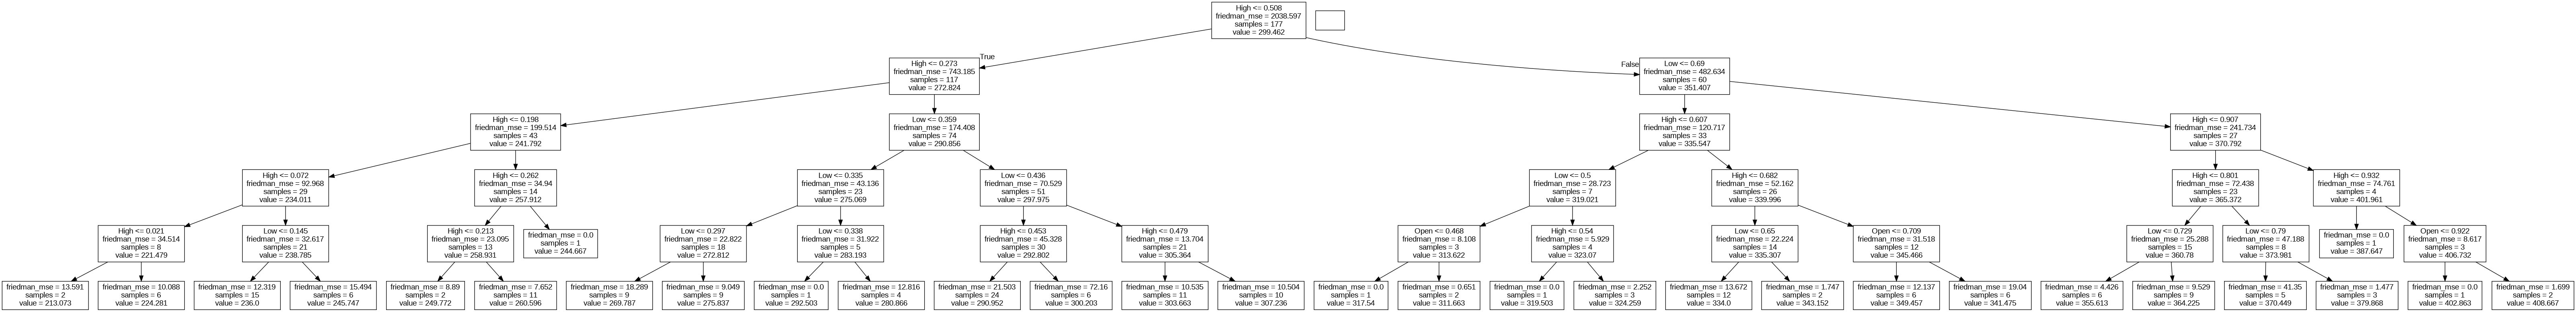

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9906617264998987

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.354347  0.332412  0.331690  280.899994           276.0
1  0.264691  0.256255  0.272974  264.536682           264.0
2  0.610079  0.594722  0.536408  314.633331           325.0
3  0.335446  0.319623  0.321194  272.243347           275.0
4  0.339262  0.374985  0.343963  290.533325           282.0
Mean Accuracy on test data: 97.9912425717387
Median Accuracy on test data: 98.2726937586725

Accuracy values for 10-fold Cross Validation:
 [98.66837797 98.23057073 98.38276584 97.52978717 98.07736047 98.02655449
 97.73963828 98.36164879 98.53515635 98.80758178]

Final Average Accuracy of the model: 98.24


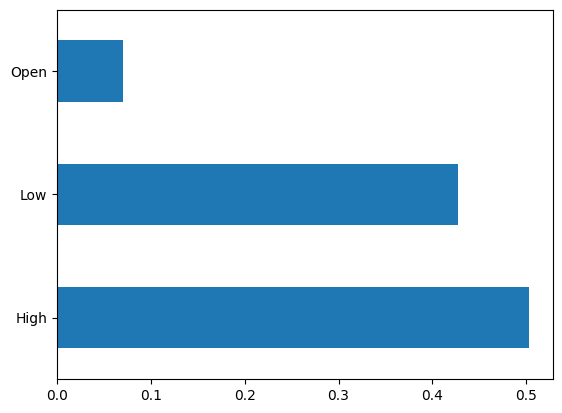

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Plotting Decision Tree in RFR

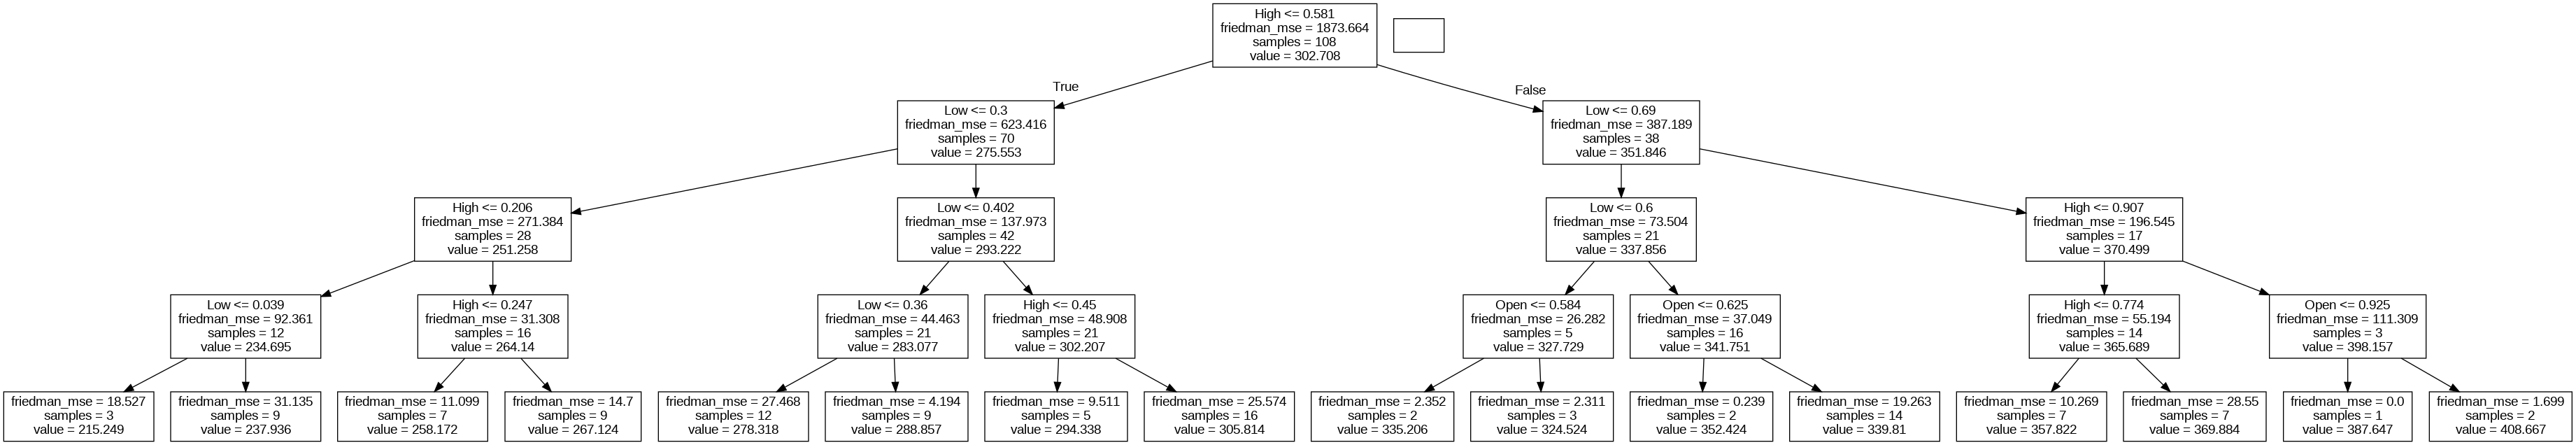

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

Step 21 AdaBoost Algorithm

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.9858619362837914

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.354347  0.332412  0.331690  280.899994           277.0
1  0.264691  0.256255  0.272974  264.536682           261.0
2  0.610079  0.594722  0.536408  314.633331           329.0
3  0.335446  0.319623  0.321194  272.243347           277.0
4  0.339262  0.374985  0.343963  290.533325           279.0
Mean Accuracy on test data: 97.79110787967944
Median Accuracy on test data: 98.19948844011107


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [98.36249049 98.23450451 98.0509953  97.02556746 97.72142262 97.98980628
 96.71507867 97.60936181 98.46150679 98.62126062]

Final Average Accuracy of the model: 97.88


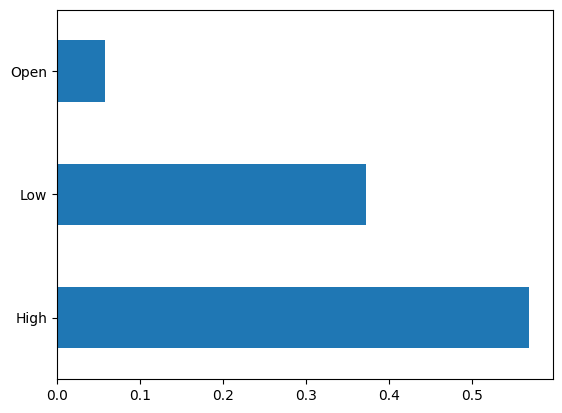

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:58:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.9998816998397739

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.354347  0.332412  0.331690  280.899994           271.0
1  0.264691  0.256255  0.272974  264.536682           264.0
2  0.610079  0.594722  0.536408  314.633331           324.0
3  0.335446  0.319623  0.321194  272.243347           276.0
4  0.339262  0.374985  0.343963  290.533325           284.0
Mean Accuracy on test data: 97.79110787967944
Median Accuracy on test data: 98.33475730075568


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:58:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:58:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:58:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [98.88504639 98.27913381 98.39054423 97.88832229 98.08335529 98.21989344
 97.97702519 98.20138913 98.88732373 98.76521587]

Final Average Accuracy of the model: 98.36


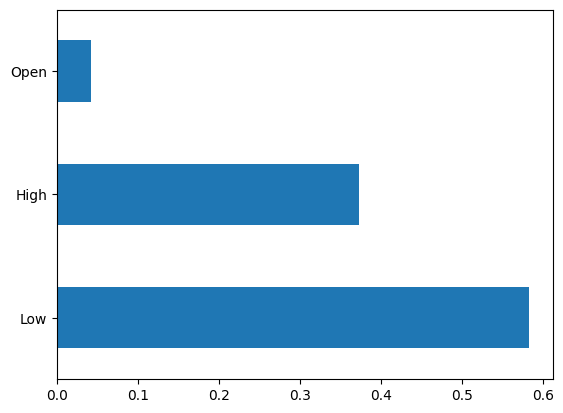

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
learning_rate=0.1,
n_estimators=1000,
objective='reg:linear',
booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Plotting a Single Decision Tree

<Axes: >

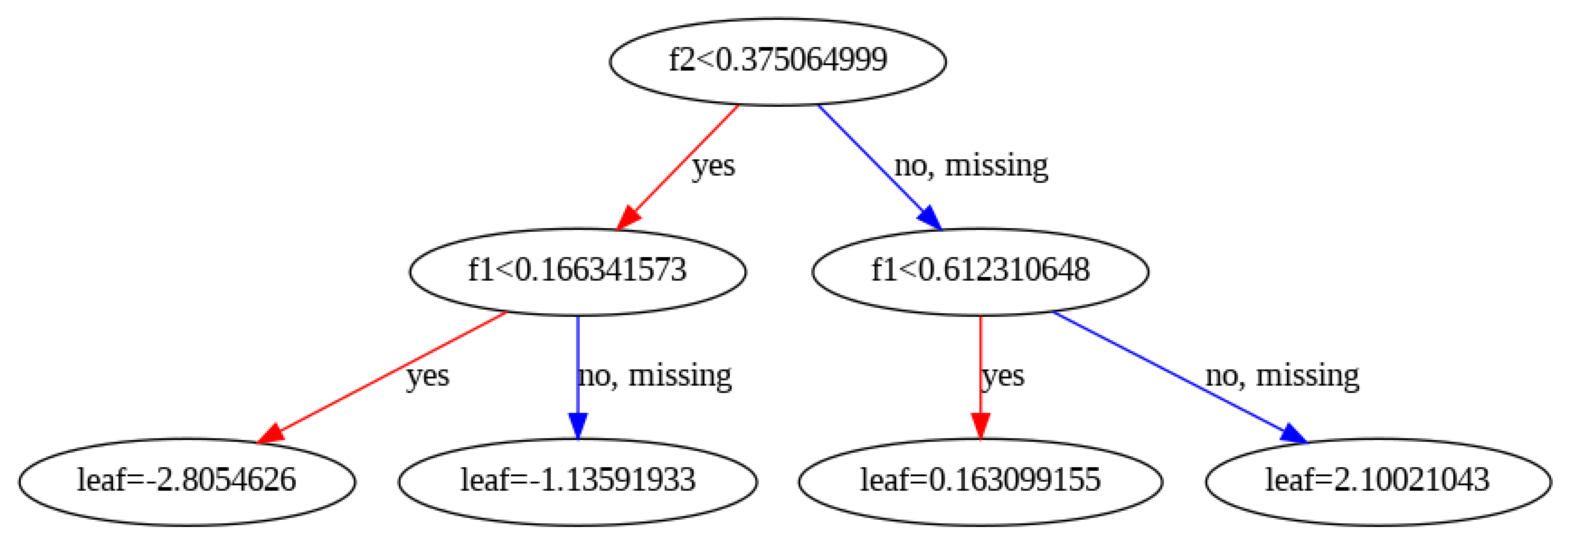

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9898694321377063

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.354347  0.332412  0.331690  280.899994           275.0
1  0.264691  0.256255  0.272974  264.536682           262.0
2  0.610079  0.594722  0.536408  314.633331           331.0
3  0.335446  0.319623  0.321194  272.243347           276.0
4  0.339262  0.374985  0.343963  290.533325           291.0
Mean Accuracy on test data: 98.12513437913745
Median Accuracy on test data: 98.52082971159415

Accuracy values for 10-fold Cross Validation:
 [98.85823329 97.91891199 98.02247554 97.44648806 98.46972206 97.95376141
 97.98786842 98.5317956  98.59570619 99.04767113]

Final Average Accuracy of the model: 98.28


Support Vector Machine Regressor

In [77]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.719836464108635

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.354347  0.332412  0.331690  280.899994           288.0
1  0.264691  0.256255  0.272974  264.536682           281.0
2  0.610079  0.594722  0.536408  314.633331           311.0
3  0.335446  0.319623  0.321194  272.243347           286.0
4  0.339262  0.374985  0.343963  290.533325           289.0
Mean Accuracy on test data: 93.03973526133026
Median Accuracy on test data: 93.5139560342189

Accuracy values for 10-fold Cross Validation:
 [94.55095608 91.34364237 93.50386212 97.63142591 96.06475752 95.59480301
 87.68542004 86.77932429 98.19121899 97.92140867]

Final Average Accuracy of the model: 93.93


Step 21: Model Deployment

*   From the above trials we can see all models perform well and produce highly accurate results.
* The algorithm with the highest accuracy however is the multiple linear regression anglorithm.
* Linear Regression: 98.82
* The model must now be trained to use all data available as we have previously subsituted data with dummy variables.
* To use this model it must be in website or GUI format.
*   First the algorithm that has been trained on all data is saved as "Final_LinearRegression.pkl".
* Next we test the function using new data to see if the algoithm is working properly.
* Our next step is to determine which of the formats we wish to present our prediction algorithm in.
* I have chosen to include both as neither one was able to be used for demonstration.
* The flask module that could be used to demonstrate on a local host port was unable to be used as "import os" would execute infinitely.
* Thus the decision was made to develop a GUI that could call the algorithm as a function. Unfortunately my software was unable to run all the modules required and thus the GUI demonstration not been included.
* All steps outlined are included below.



In [78]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9899937533760674

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.354347  0.332412  0.331690  280.899994           277.0
1  0.264691  0.256255  0.272974  264.536682           267.0
2  0.610079  0.594722  0.536408  314.633331           319.0
3  0.335446  0.319623  0.321194  272.243347           275.0
4  0.339262  0.374985  0.343963  290.533325           288.0
Mean Accuracy on test data: 98.81563905263931

Accuracy values for 10-fold Cross Validation:
 [99.17425879 98.80828309 98.7448211  98.35777343 98.7811455  98.59233323
 98.67083235 98.82471311 99.04293821 99.13887701]

Final Average Accuracy of the model: 98.81


In [79]:
#Train Model on all data
Final_LinearRegression=RegModel.fit(X,y)


In [80]:
#Saving Model as Serialized File

import pickle
import os

#Save python file using pickle
with open('Final_LinearRegression.pkl', 'wb') as filewriteStream:
  pickle.dump(Final_LinearRegression, filewriteStream)
  filewriteStream.close

print ('pickle file for Linear Regression Predictive Model saved at location:',os.getcwd())


pickle file for Linear Regression Predictive Model saved at location: /content/drive/MyDrive/CapstoneProject


Step 24: Python Function



In [82]:
from re import IGNORECASE

def FunctionPredictResult(InputData):
  import pandas as pd
  Num_Inputs=InputData.shape[0]

  #Append new data with training data
  DataforML=pd.read_pickle('DataForML.pkl')
  InputData = pd.concat([InputData, DataForML], ignore_index=True)

  #Generate dummy variables
  InputData=pd.get_dummies(InputData)

  Predictors=['Open', 'High', 'Low']

  #Generating input values to the model
  X=InputData[Predictors].values[0:Num_Inputs]

  #Generate standard values of X
  X=PredictorScalerFit.transform(X)

  #Load function from pickle file
  import pickle
  with open('Final_LinearRegression.pkl', 'rb') as fileReadStream:
    PredictionModel=pickle.load(fileReadStream)
    fileReadStream.close()

  #Generate Predictions
  Prediction=PredictionModel.predict(X)
  PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
  return(PredictionResult)


In [83]:
#Calling function for some new data
NewSampleData=pd.DataFrame(data=[[264.6, 258.4, 260.2],[281.4, 280.1, 280.7]], columns=['High','Low','Open'])

print(NewSampleData)

#Calling Function for Prediction
PredictionResult = FunctionPredictResult(InputData=NewSampleData)
print(PredictionResult)

    High    Low   Open
0  264.6  258.4  260.2
1  281.4  280.1  280.7
   Prediction
0  262.775070
1  281.081848


In [84]:
# Import pandas module
import pandas as pd

# Function to take inputs and return prediction

def GenerateClosePrediction(inp_Open, inp_High, inp_Low):

  #Datafram for model inputs
  SampleInputData=pd.DataFrame(
    data=[[inp_Open, inp_High, inp_Low]],
    columns=['Open','High','Low'])

  #Call Function
  Predictions=FunctionPredictResult(InputData= SampleInputData)

  #Return the predictions
  return(Predictions.to_json())

#Call Function
GenerateClosePrediction( inp_Open=260.2,
                        inp_Low=258.4,
                        inp_High=264.6
)



'{"Prediction":{"0":262.7750697811}}'

In [85]:
!pip install flask

Flask API

In [86]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [88]:
app=Flask (__name__)

app.route('/prediction_api', method=["GET"])
def prediction_api():
  try:
    #Retrieve parameters from API
    Open_Value = float(request.args.get('Open'))
    High_Value = float(request.args.get('High'))
    Low_Value = float(request.args.get('Low'))

    #Calling fuction for predictions
    prediction_from_api=FunctionGeneratePrediction(
        inp_Open=Open_value,
        inp_High=High_value,
        inp_Low=Low_value
    )

    return (prediction_from_api)

  except Exception as e:
    return("Something's gone wrong!: "+str(e))

API Engine

In [97]:
import os

def main():
  #localhosting API
  print(app)
  app.run(host='localhost', port=5000, threaded=True, debug=True, use_reloader=False)

if __name__ == "__main__":
  main()

<Flask '__main__'>
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://localhost:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
Sample Url to call API
Copy and paste the link below in your web browser
http://127.0.0.1:5000/prediction_api?Open=260.2&High=258.4&Low=264.6

SyntaxError: invalid syntax (<ipython-input-75-8eb236429678>, line 1)

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

class TeslaStockPredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Tesla Stock Closing Price Prediction')
        self.data = pd.read_csv('TeslaData.csv')
        self.sliders = []

        self.X = self.data.drop('Close', axis=1).values
        self.y = self.data['Close'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal", command=lambda val, current_val_label=current_val_label: current_val_label.config(text=f'{float(val): .2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Close Value', command=self.predict_value)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_value(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        value = self.model.predict([inputs])
        messagebox.showinfo('Predicted Value', f'The predicted Closing Stock Value is ${value[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = TeslaStockPredictionApp(root)
    root.mainloop()

TclError: no display name and no $DISPLAY environment variable